In [ ]:
import torch
import torchvision
from torchvision import transforms

# Define the transformation to be applied to each image
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Adjust the size as needed
    transforms.ToTensor(),
])

# Download and create the VOC Detection dataset for 2012
train_dataset = torchvision.datasets.VOCDetection(
    root='./data',  # Change the root directory as needed
    year='2012',
    image_set='train',
    transform=transform,
    download=True
)

# Create a DataLoader for the training dataset
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=2,  # Adjust the batch size as needed
    shuffle=True
)

In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchvision.transforms.functional import resize


class MyCollate:
    def __init__(self, resize_size=(128, 128)):
        self.resize_size = resize_size

    def __call__(self, batch):
        images, labels = zip(*batch)

        # Resize images to the specified size
        resized_images = [resize(img, self.resize_size, antialias=True) for img in images]

        # Stack resized images into a batch
        batched_images = torch.stack(resized_images)

        return batched_images, labels

# Define the transformation to be applied to each image
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download and create the VOC Detection dataset for 2012
train_dataset = torchvision.datasets.VOCDetection(
    root='./data',  # Change the root directory as needed
    year='2012',
    image_set='train',
    transform=transform,
    download=True
)

# Create a DataLoader for the training dataset with custom collate function
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,  # Adjust the batch size as needed
    shuffle=True,
    collate_fn=MyCollate()
)


In [ ]:
images, labels = next(iter(train_loader))

In [ ]:
print(len(images))
print(len(labels))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


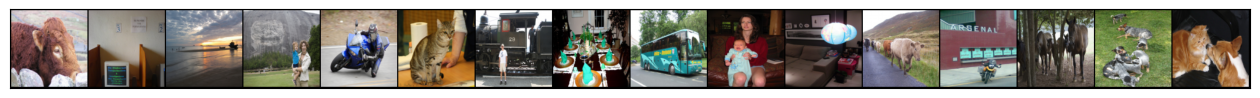

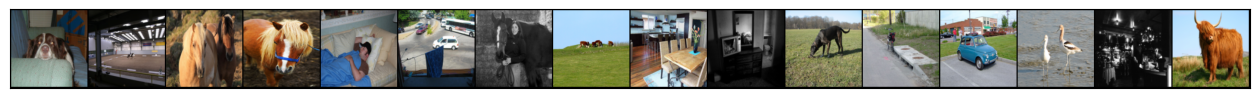

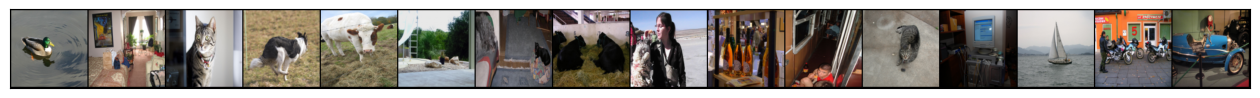

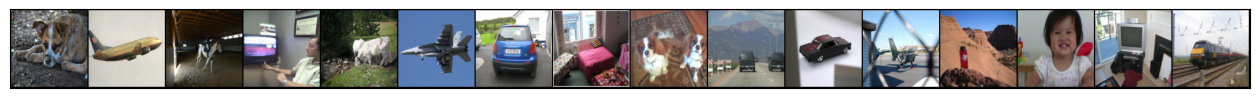

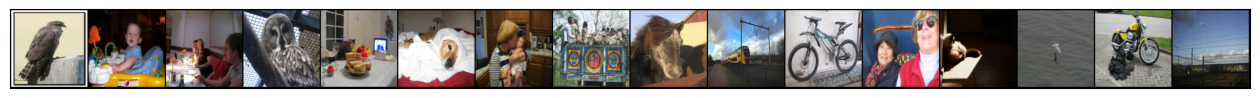

In [13]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

from itertools import islice

num = 5

def show_batch(batch_images):
    # for images, _ in dl:
    fig,ax = plt.subplots(figsize=(16,12))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(batch_images,nrow=16).permute(1,2,0))
        # break

for batch_images, _ in islice(train_loader, num):
    show_batch(batch_images)